In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree


In [20]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info() # прочитаем информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Missing values heatmap')

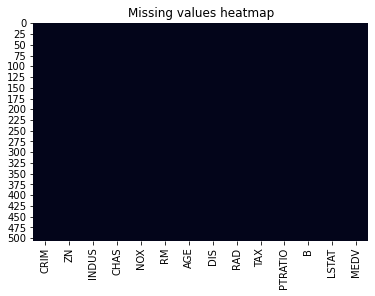

In [7]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

Данные с пропусками отсутствуют

In [8]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X, y = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']], data['MEDV']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
model = LinearRegression()

# обучаем на части датасета (train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [13]:
model.score(X_train, y_train)

0.7508856358979673

In [14]:
model.score(X_test, y_test)

0.6687594935356294

Дерево решений

In [15]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=3, criterion='friedman_mse', random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )  
model = dtr.fit(X_train, y_train)
print('Score = ', dtr.score(X_test, y_test))

Score =  0.8597148032462001


In [16]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [44.48]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |--- value: [16.13]
|   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |--- feature_10 <= 17.85
|   |   |   |   |   |   |   |--- feature_9 <= 324.00
|   |   |   |   |   |   |   |   |--- feature_10 <= 17.10
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [22.78]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [20.87]
|   |   |   |   |   |   |   |   |--- feature_10 >  17.10
|   |   |   |   |   |   |   |   |   |--- value: [24.90]
|   |   |   |   |   |   |   |--- feature_9 >  324.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 1.23
|   |   |   |   |   |   |   |   

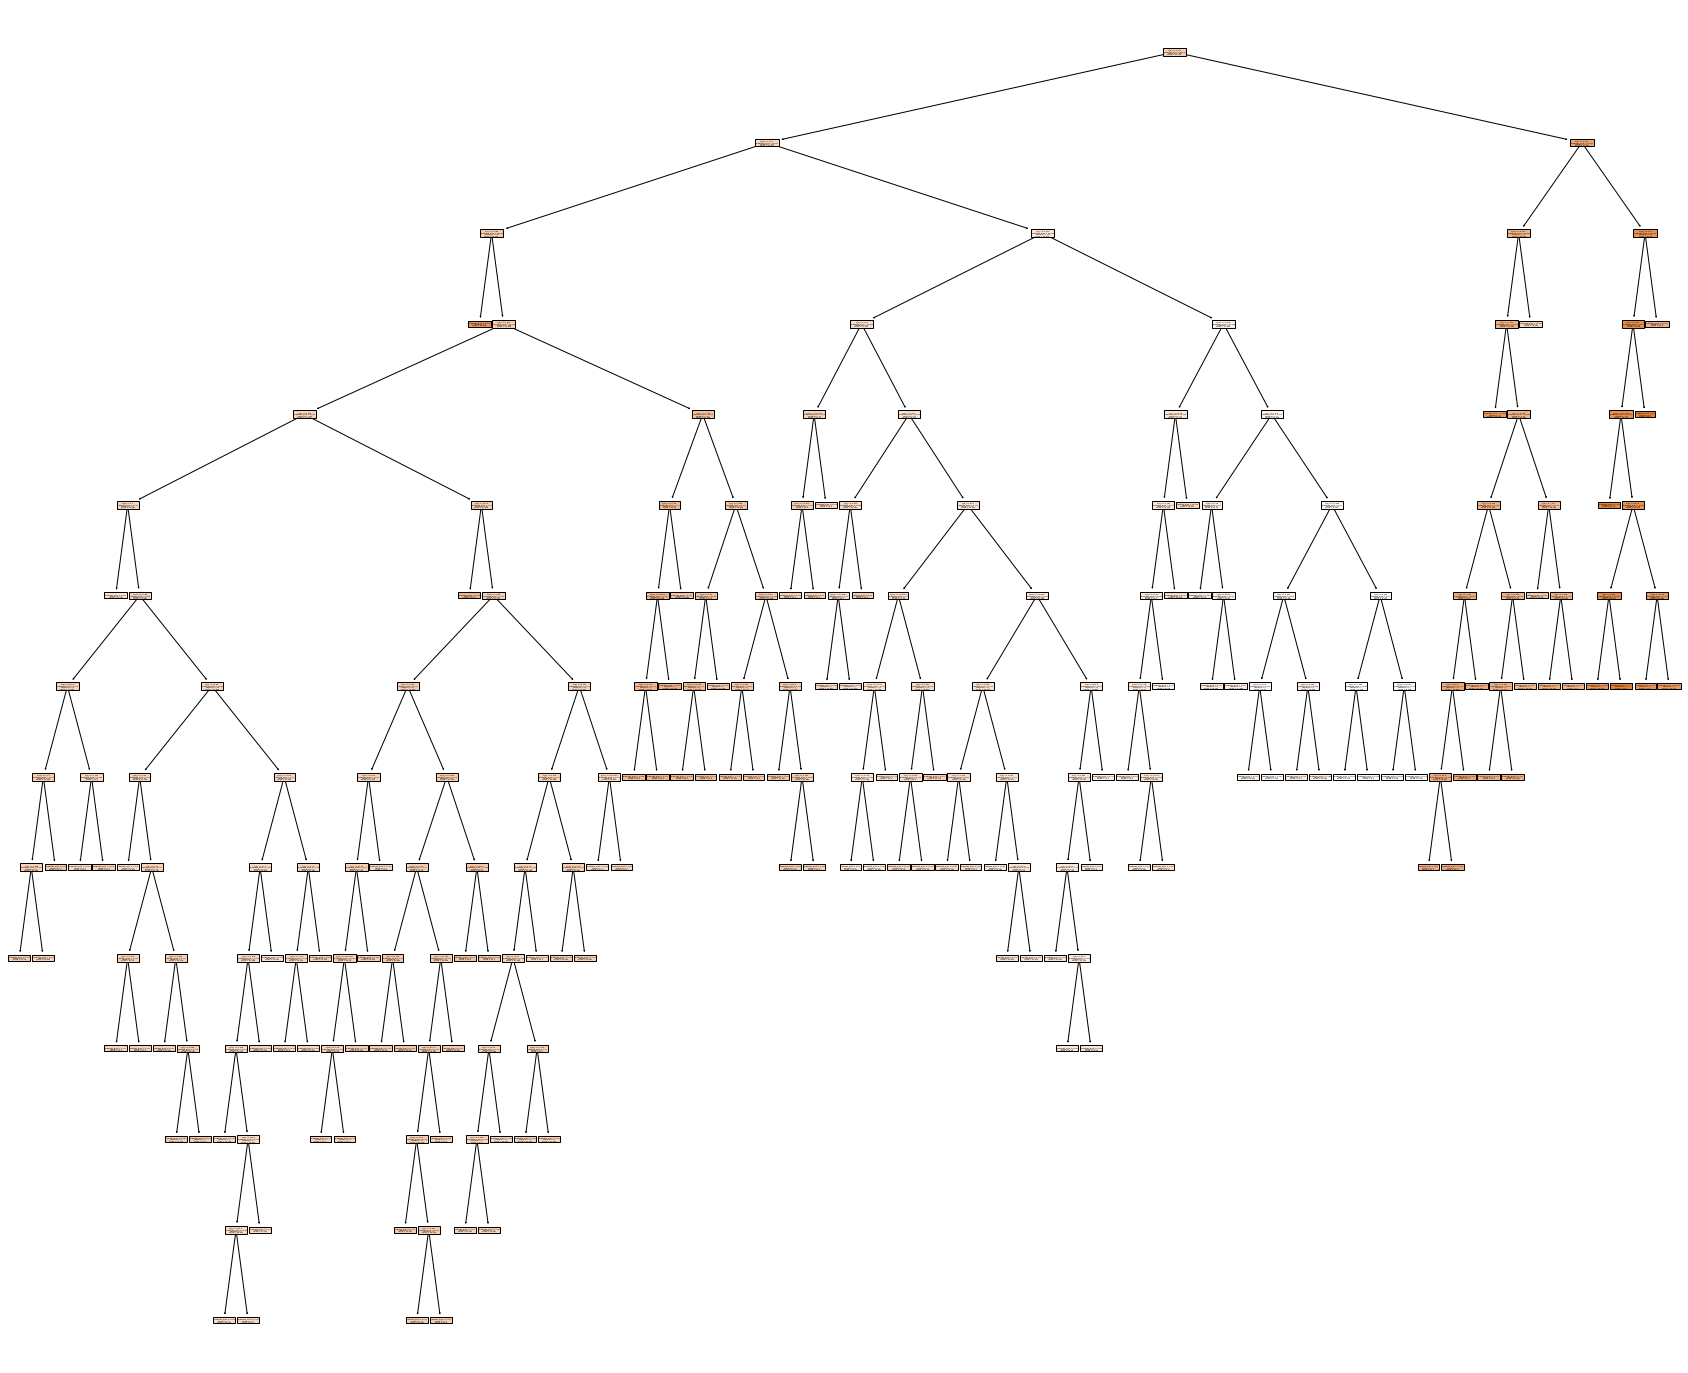

In [47]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(dtr, filled=True)